Importando o  dataset disney_movies_total_gross.csv e salvar com o nome dados.

In [1]:
#Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leia o arquivo 
dados = pd.read_csv('/work/disney_movies_total_gross.csv', parse_dates =['release_date'])

Imprimindo as primeiras linhas desse dataset

In [2]:
dados.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


Agora, antes de mais nada vamos renomear as colunas para ficar mais fácil o entendimento?

['tit_do_filme','dt_lancamento','genero','classificacao_mpaa','bilheteria_bruta','bilheteria_ajustada_inflacao']

In [3]:
dados.columns=['tit_do_filme','dt_lancamento','genero','classificacao_mpaa','bilheteria_bruta','bilheteria_ajustada_inflacao']

In [4]:
dados.head()

,tit_do_filme,dt_lancamento,genero,classificacao_mpaa,bilheteria_bruta,bilheteria_ajustada_inflacao
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


Imprimindo informações básicas sobre o DataFrame

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tit_do_filme                  579 non-null    object        
 1   dt_lancamento                 579 non-null    datetime64[ns]
 2   genero                        562 non-null    object        
 3   classificacao_mpaa            523 non-null    object        
 4   bilheteria_bruta              579 non-null    int64         
 5   bilheteria_ajustada_inflacao  579 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 27.3+ KB


Calculando a média da bilheteria ajustada

In [6]:
dados['bilheteria_ajustada_inflacao'].mean()

118762523.31088082

Calculando a mediana da bilheterias ajustada

In [7]:
dados['bilheteria_ajustada_inflacao'].median()

55159783.0

7 - Encontre as datas máximas e minimas de lançamentos de filmes nesse dataset

In [8]:
print('O filme mais recente é de {}'.format(dados['dt_lancamento'].max()))
print('O filme mais antigo é de {}'.format(dados['dt_lancamento'].min()))

O filme mais recente é de 2016-12-16 00:00:00
O filme mais antigo é de 1937-12-21 00:00:00


8 - Qual filme tem maior bilheteria_ajustada_inflacao ?

In [9]:
dados.loc[(dados['bilheteria_ajustada_inflacao'] == dados['bilheteria_ajustada_inflacao'].max())]

#dados.sort_values(by='bilheteria_ajustada_inflacao', ascending=False).head(1) - Opção 2

#dados[dados['bilheteria_ajustada_inflacao'] ==dados['bilheteria_ajustada_inflacao'].max() ]

,tit_do_filme,dt_lancamento,genero,classificacao_mpaa,bilheteria_bruta,bilheteria_ajustada_inflacao
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251


Ordenando os dados por dt_lancamento e chame de data_ordenada

In [10]:
data_ordenada = dados.sort_values(by = 'dt_lancamento', ascending=True)
print(data_ordenada)

                        tit_do_filme dt_lancamento     genero  \
0    Snow White and the Seven Dwarfs    1937-12-21    Musical   
1                          Pinocchio    1940-02-09  Adventure   
2                           Fantasia    1940-11-13    Musical   
3                  Song of the South    1946-11-12  Adventure   
4                         Cinderella    1950-02-15      Drama   
..                               ...           ...        ...   
574         The Light Between Oceans    2016-09-02      Drama   
575                   Queen of Katwe    2016-09-23      Drama   
576                   Doctor Strange    2016-11-04  Adventure   
577                            Moana    2016-11-23  Adventure   
578     Rogue One: A Star Wars Story    2016-12-16  Adventure   

    classificacao_mpaa  bilheteria_bruta  bilheteria_ajustada_inflacao  
0                    G         184925485                    5228953251  
1                    G          84300000                    2188229052  


Obtendo a soma cumulativa da bilheteria_ajustada_inflacao,adicione ao dataset com o nome de bilheteria_milionaria

In [11]:
dados_bilheteria = dados.bilheteria_ajustada_inflacao
dados['bilheteria_milionaria'] = dados_bilheteria.cumsum()


In [12]:
dados['bilheteria_milionaria'].head()

0     5228953251
1     7417182303
2     9604273111
3    10682783690
4    11603392420
Name: bilheteria_milionaria, dtype: int64

Contando o número de filmes por genero e ordene

In [13]:
dados['genero'].value_counts(sort=True)

Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Documentary             16
Musical                 16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genero, dtype: int64

Calculando agora a proporção de filmes por genero e ordene

In [14]:
dados.isnull().sum()

tit_do_filme                     0
dt_lancamento                    0
genero                          17
classificacao_mpaa              56
bilheteria_bruta                 0
bilheteria_ajustada_inflacao     0
bilheteria_milionaria            0
dtype: int64

In [15]:
porcentagem = (dados['genero'].value_counts()/dados['genero'].value_counts().sum())*100

#dados['genero'].value_counts(normalize=True) - Opção 2

Estatísticas resumidas agrupadas

Total da "bilheteria_bruta"

In [16]:
dados['bilheteria_bruta'].sum()

37462335553

Tipos de generos que tem nesse dataset:

In [17]:
genero = dados['genero'].unique()

18 - Calcule o total da bilheteria_bruta pelo genero 'Drama'

In [18]:
for i in genero:
    acumulado = dados.loc[dados['genero'] == i]['bilheteria_bruta'].sum()
    print('O valor acumulado dos filmes de {} é R${}'.format(i, acumulado))

O valor acumulado dos filmes de Musical é R$1157284155
O valor acumulado dos filmes de Adventure é R$16389069453
O valor acumulado dos filmes de Drama é R$4106972970
O valor acumulado dos filmes de Comedy é R$8119619678
O valor acumulado dos filmes de nan é R$0
O valor acumulado dos filmes de Action é R$4184563282
O valor acumulado dos filmes de Horror é R$87068872
O valor acumulado dos filmes de Romantic Comedy é R$1152206855
O valor acumulado dos filmes de Thriller/Suspense é R$1406806519
O valor acumulado dos filmes de Western é R$359011459
O valor acumulado dos filmes de Black Comedy é R$97543212
O valor acumulado dos filmes de Documentary é R$180685619
O valor acumulado dos filmes de Concert/Performance é R$103456466


Para cada genero de filme, agregue a bilheteria_bruta obtendo min, max, média e mediana e imprima o resultado

In [19]:
dados.groupby(['genero'])['bilheteria_bruta'].agg(Minimo='min',Maximo='max',Media='mean',Mediana='median')

,Minimo,Maximo,Media,Mediana
genero,,,,
Action,0,623279547,1.046141e+08,43315244.5
Adventure,2815,936662225,1.270471e+08,65000000.0
Black Comedy,17105219,52353636,3.251440e+07,28084357.0
Comedy,45779,244082982,4.461329e+07,26923500.5
Concert/Performance,38174685,65281781,5.172823e+07,51728233.0
Documentary,20521,32011576,1.129285e+07,9688331.0
Drama,0,201151353,3.602608e+07,19730097.0
Horror,4877567,26570463,1.451148e+07,13439137.5
Musical,5632086,218951625,7.233026e+07,53041787.5


In [20]:
x1 = dados.groupby(['genero'])['bilheteria_bruta'].agg([np.min,np.max,np.mean])

In [21]:
x1

,amin,amax,mean
genero,,,
Action,0,623279547,1.046141e+08
Adventure,2815,936662225,1.270471e+08
Black Comedy,17105219,52353636,3.251440e+07
Comedy,45779,244082982,4.461329e+07
Concert/Performance,38174685,65281781,5.172823e+07
Documentary,20521,32011576,1.129285e+07
Drama,0,201151353,3.602608e+07
Horror,4877567,26570463,1.451148e+07
Musical,5632086,218951625,7.233026e+07


Para cada genero de filme, agregue bilheteria_bruta e bilheteria_ajustada_inflacao: obtenha o minimo, maximo, média e mediana

In [22]:
dados.groupby(['genero'])['bilheteria_bruta','bilheteria_ajustada_inflacao'].agg(['min','max','mean','median'])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


bilheteria_bruta                                       \
                                 min        max          mean      median   
genero                                                                      
Action                             0  623279547  1.046141e+08  43315244.5   
Adventure                       2815  936662225  1.270471e+08  65000000.0   
Black Comedy                17105219   52353636  3.251440e+07  28084357.0   
Comedy                         45779  244082982  4.461329e+07  26923500.5   
Concert/Performance         38174685   65281781  5.172823e+07  51728233.0   
Documentary                    20521   32011576  1.129285e+07   9688331.0   
Drama                              0  201151353  3.602608e+07  19730097.0   
Horror                       4877567   26570463  1.451148e+07  13439137.5   
Musical                      5632086  218951625  7.233026e+07  53041787.5   
Romantic Comedy               468240  178406268  5.009595e+07  32680633.0   
Thriller/Suspense            2154540  293506292  5.861694e+07  28153827.0   
Western                      8247627   89302115  5.128735e+07  56932305.0   

                    bilheteria_ajustada_inflacao                            \
                                             min         max          mean   
genero                                                                       
Action                                         0   660081224  1.374734e+08   
Adventure                                   2984  2188229052  1.903974e+08   
Black Comedy                            28392518    76758193  5.224349e+07   
Comedy                                     82277  1362870985  8.466773e+07   
Concert/Performance                     38174685    76646993  5.741084e+07   
Documentary                                23064    35981010  1.271803e+07   
Drama                                          0  1236035515  7.189302e+07   
Horror                                   9907922    48546161  2.341385e+07   
Musical                                 11468231  5228953251  6.035979e+08   
Romantic Comedy                           907414   356389765  7.777708e+07   
Thriller/Suspense                        3957025   485424724  8.965379e+07   
Western                                 15983331   115781734  7.381571e+07   

                                  
                          median  
genero                            
Action                69012064.5  
Adventure            102254492.0  
Black Comedy          51579764.0  
Comedy                51195217.0  
Concert/Performance   57410839.0  
Documentary           12344483.5  
Drama                 39325794.0  
Horror                18589709.5  
Musical              103167587.5  
Romantic Comedy       57925202.0  
Thriller/Suspense     51804588.0  
Western               89042541.0

Somando a bilheteria_bruta por genero

In [24]:
soma_genero = dados.groupby(['genero'])['bilheteria_bruta'].sum()

Text(0.5, 1.0, 'Bilheteria bruta por genero')

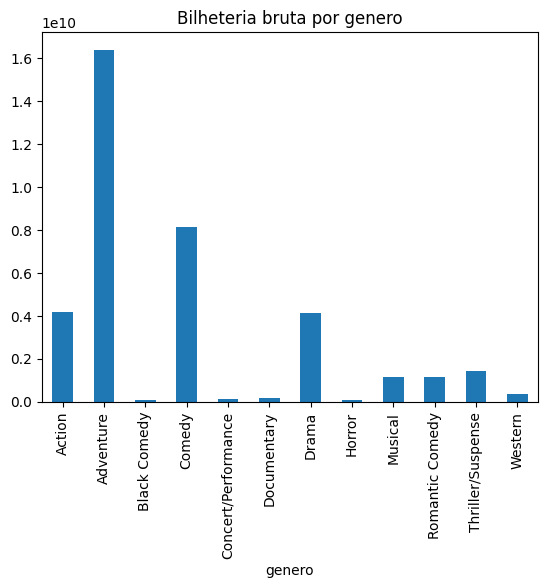

In [25]:
import matplotlib.pyplot as plt
soma_genero.plot.bar()
plt.title('Bilheteria bruta por genero')

Fazendo um boxplot comparando a bilheteria_ajustada_inflacao dos filmes de ação e comédia


In [27]:
acao_comedia = dados[dados['genero'].isin(['Action','Comedy'])]

Text(0.5, 1.0, 'Comparação Bilheteria Ajustada Inflacao dos filmes de Ação e Comedia')

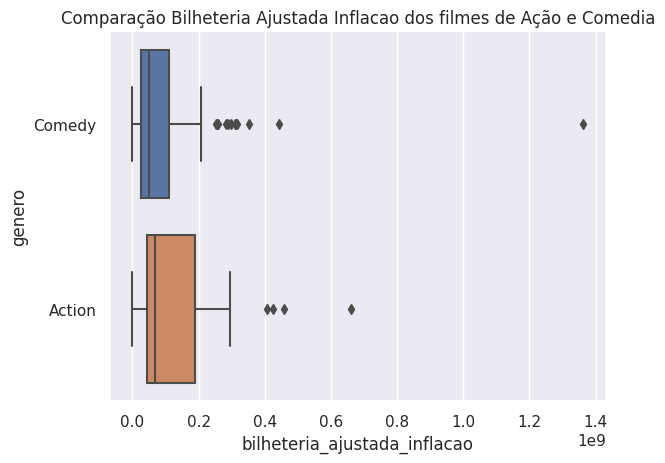

In [28]:
sns.boxplot(data=acao_comedia, x='bilheteria_ajustada_inflacao', y='genero')
sns.set_theme(style='whitegrid')
plt.title('Comparação Bilheteria Ajustada Inflacao dos filmes de Ação e Comedia')

Podemos concluir que a mediana doa bilheteria ajustada dos filmes de ação é maior e o desvio também é maior, ou seja, os valores estão mais dispersos entre eles.

Porém, tem 1 filme de comédia que tem o valor muito discrepante quando comparado com os outros.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6696d0e-efaa-4520-8de4-2b7dfe9d9712' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>